1. Import libraries

In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2. Load dataset

In [4]:
df = pd.read_csv("shopping_trends.csv")

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.shape

(3900, 19)

In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [10]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [11]:
df.duplicated().sum()

0

3. Analysis

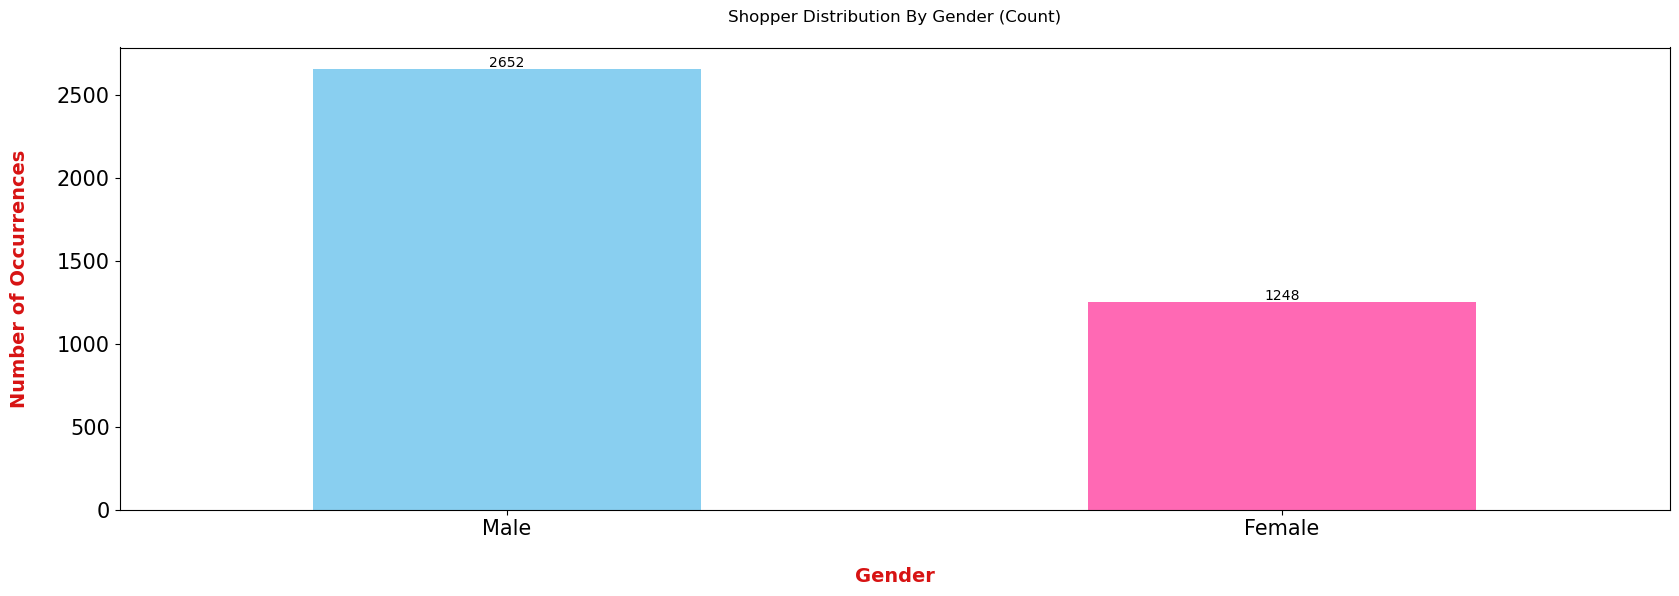

In [12]:
#Shopper distribution by gender (count)
plt.figure(figsize = (20, 6))
ax = df['Gender'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))
plt.xlabel('Gender', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Shopper Distribution By Gender (Count)\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The majority of shoppers are male, accounting for 2,652 individuals, while female shoppers make up 1,248. This indicates that male customers are more active in shopping compared to female counterparts.

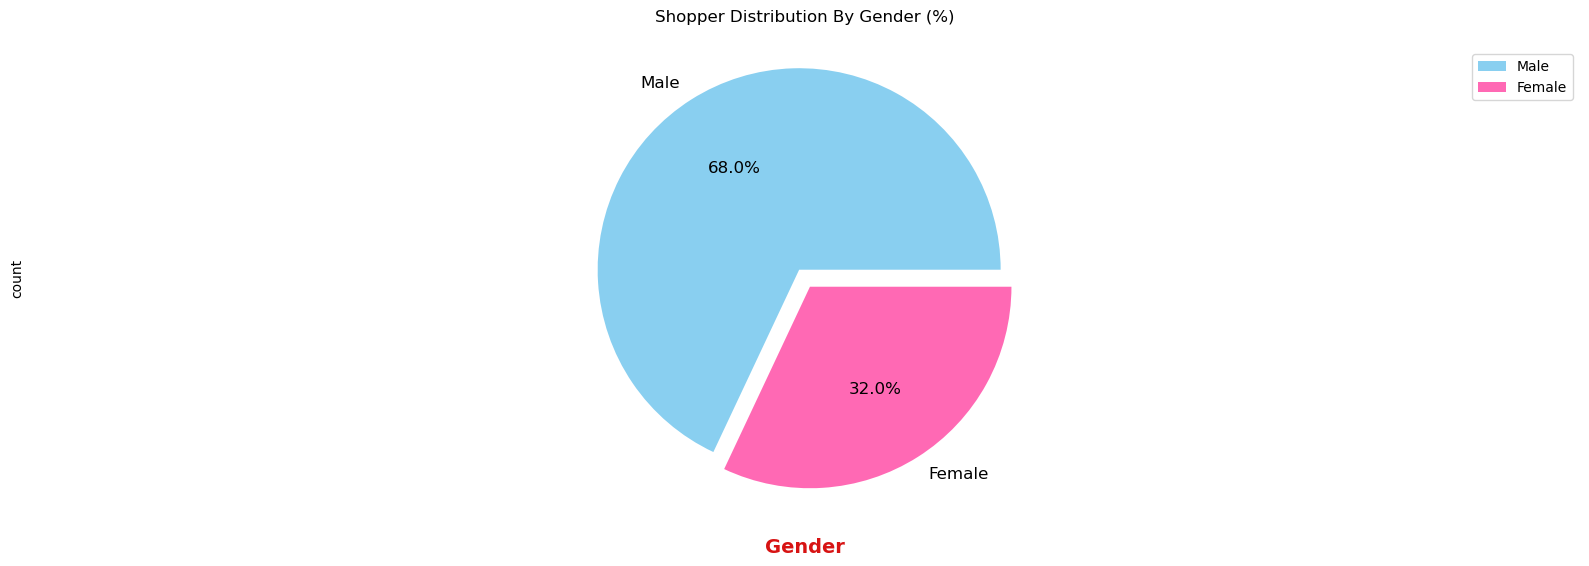

In [13]:
#Shopper distribution by gender (percentage)
plt.figure(figsize = (20, 6))
df['Gender'].value_counts().plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0, 0.1), autopct = '%1.1f%%')
plt.xlabel('Gender', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Gender'].value_counts().index, loc = 'best')
plt.title('Shopper Distribution By Gender (%)\n')
plt.show()

Further supporting the previous analysis, the bar chart shows that the number of male shoppers (68.0%) is significantly higher than that of female shoppers (32.0%). This reinforces the observed gender disparity, as male customers not only make up a larger proportion but also outnumber female shoppers in absolute count.

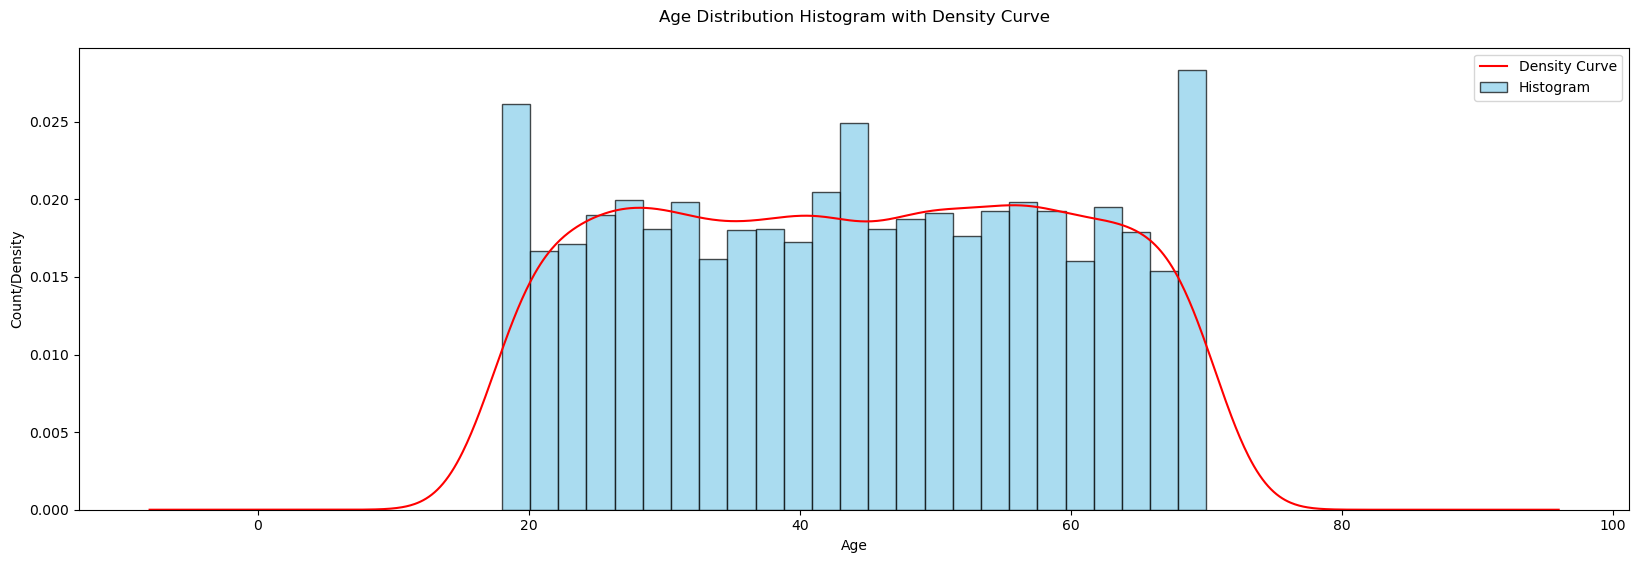

In [14]:
#Shopper distribution by age
fig, ax = plt.subplots(figsize = (20, 6))
ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count/Density')
ax.set_title('Age Distribution Histogram with Density Curve\n')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

The histogram and density curve illustrate the age distribution of shoppers. The distribution appears fairly uniform across most age groups, with a slight concentration in the middle-aged range. There are relatively fewer younger and older shoppers, as indicated by the tapering density curve at both ends.

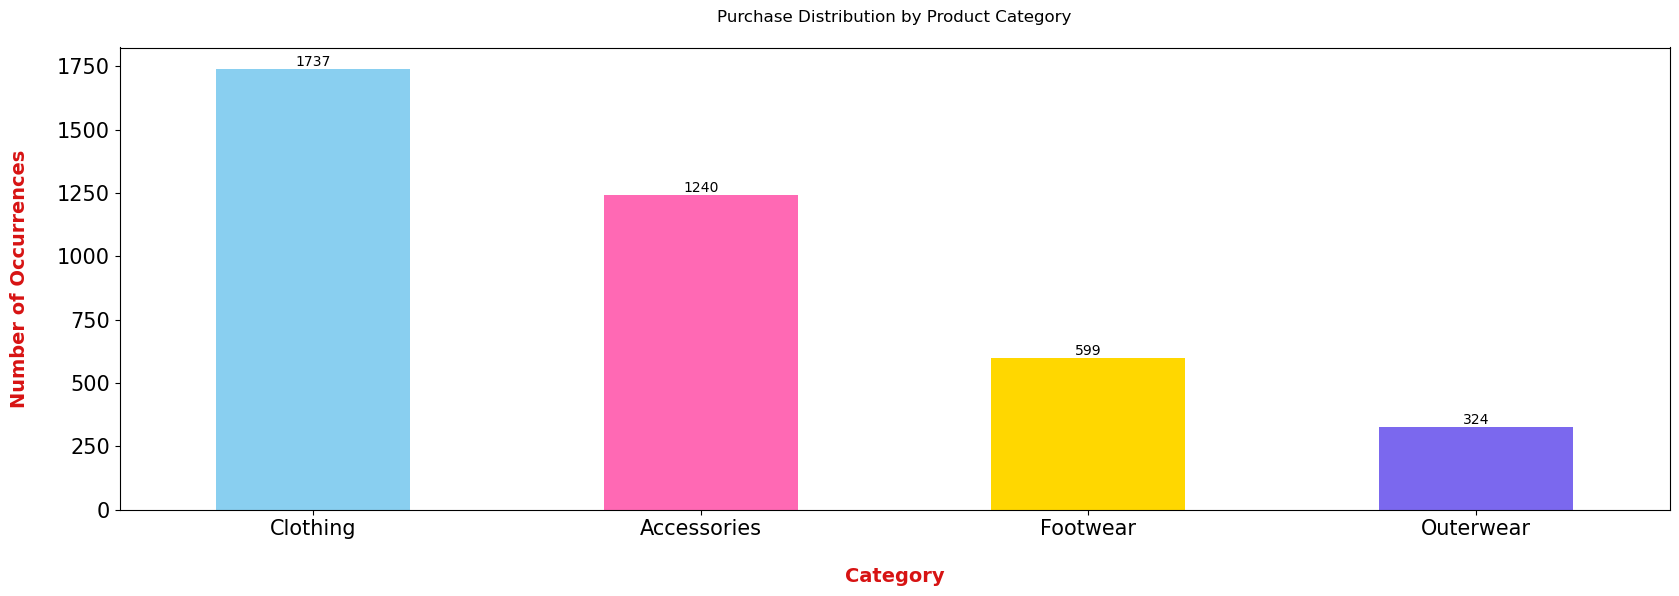

In [15]:
#Purchase distribution by product category
plt.figure(figsize = (20, 6))
ax = df['Category'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels = (df['Category'].value_counts().index)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Category', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Purchase Distribution by Product Category\n')
plt.show()

This suggests that shoppers prioritize clothing and accessories over other categories.

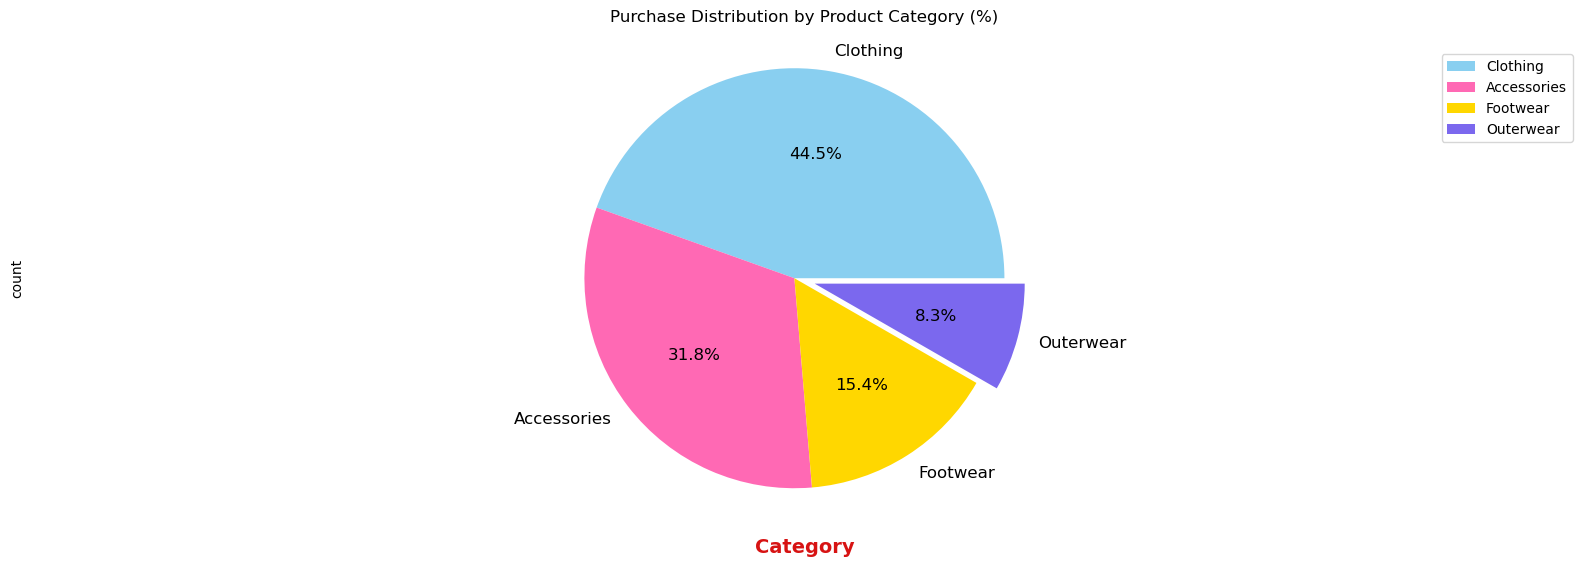

In [16]:
#Purchase distribution by product category (%)
plt.figure(figsize = (20, 6))
df['Category'].value_counts().plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0, 0, 0, 0.1), autopct = '%1.1f%%')
plt.xlabel('Category', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Category'].value_counts().index, loc = 'best')
plt.title('Purchase Distribution by Product Category (%)\n')
plt.show()

Further supporting the previous analysis, the bar chart shows that the number of clothing and accessories purchases (44.5% and 31.8% respectively) is significantly higher than that of footwear and outerwear (15.4% and 8.3% respectively).

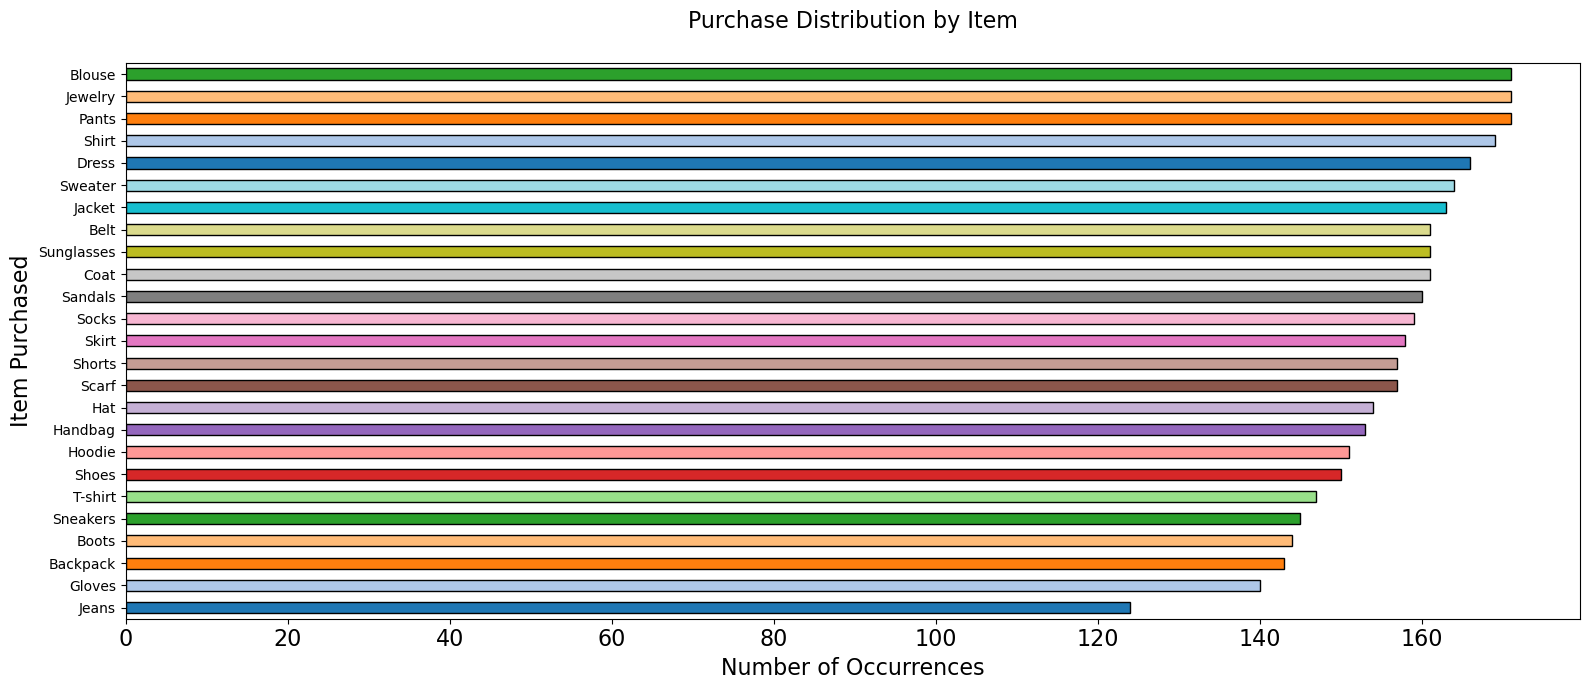

In [17]:
#Purchase distribution by item
plt.figure(figsize = (16, 7))
df['Item Purchased'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize = 16)
plt.title('Purchase Distribution by Item\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

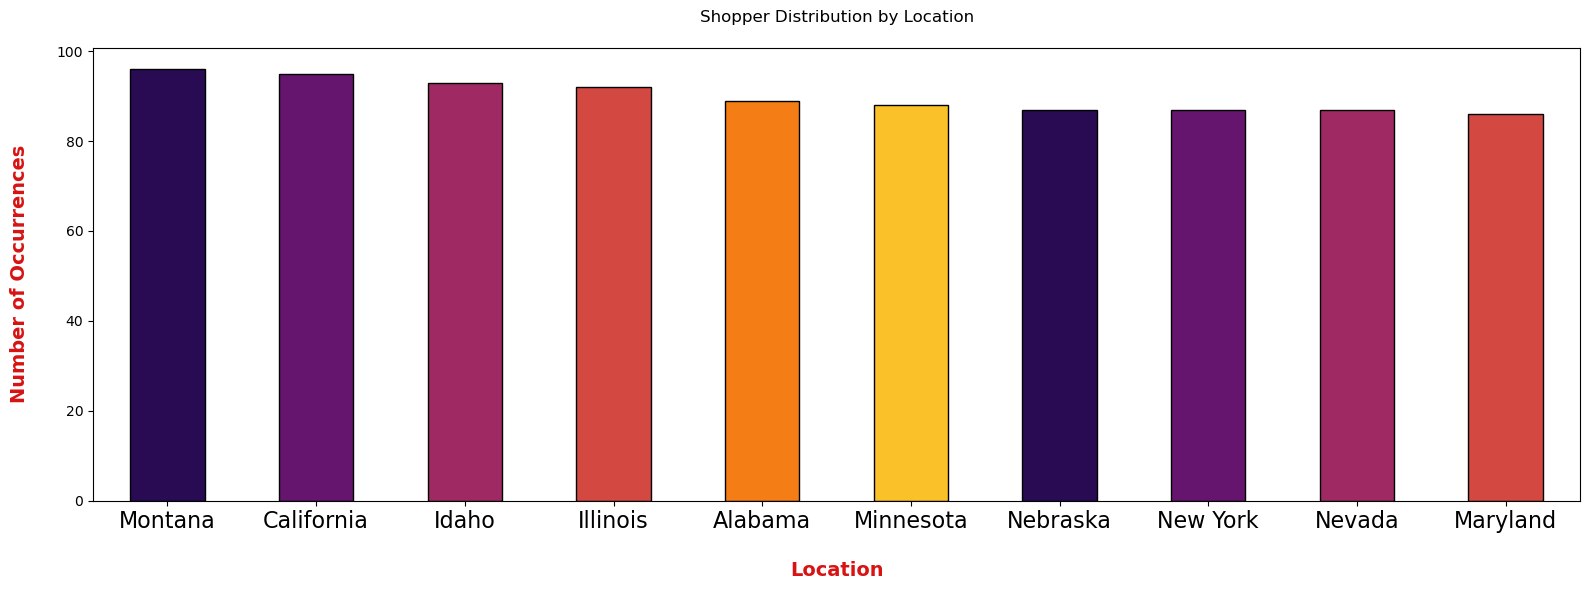

In [18]:
#Shopper distribution by location
plt.figure(figsize = (16, 6))
df['Location'].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.title('Shopper Distribution by Location\n')
plt.tight_layout()
plt.show()

Shoppers are distributed almost evenly throughout the states.

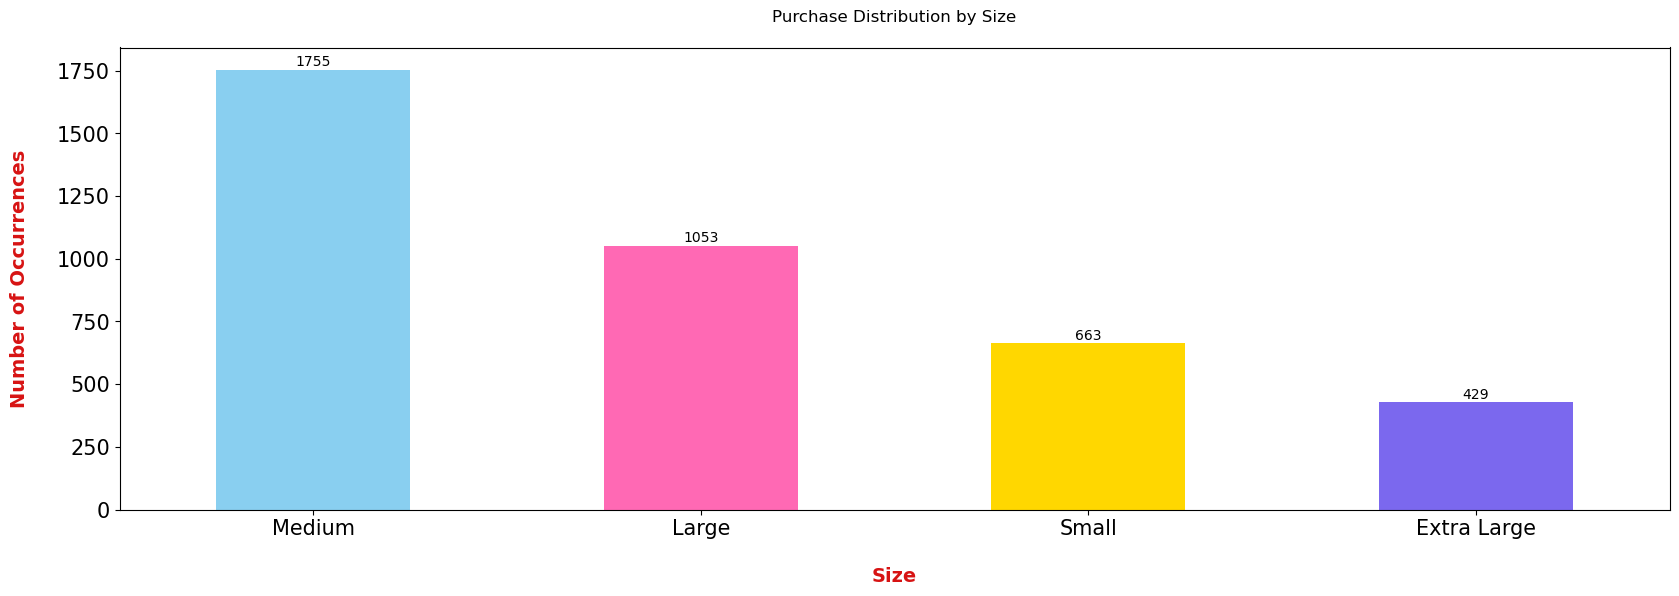

In [19]:
#Purchase distribution by size
plt.figure(figsize = (20, 6))
ax = df['Size'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(['Medium', 'Large', 'Small', 'Extra Large'])
plt.xlabel('Size', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Purchase Distribution by Size\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

This suggests that medium size is prioritized significantly among the available sizes.

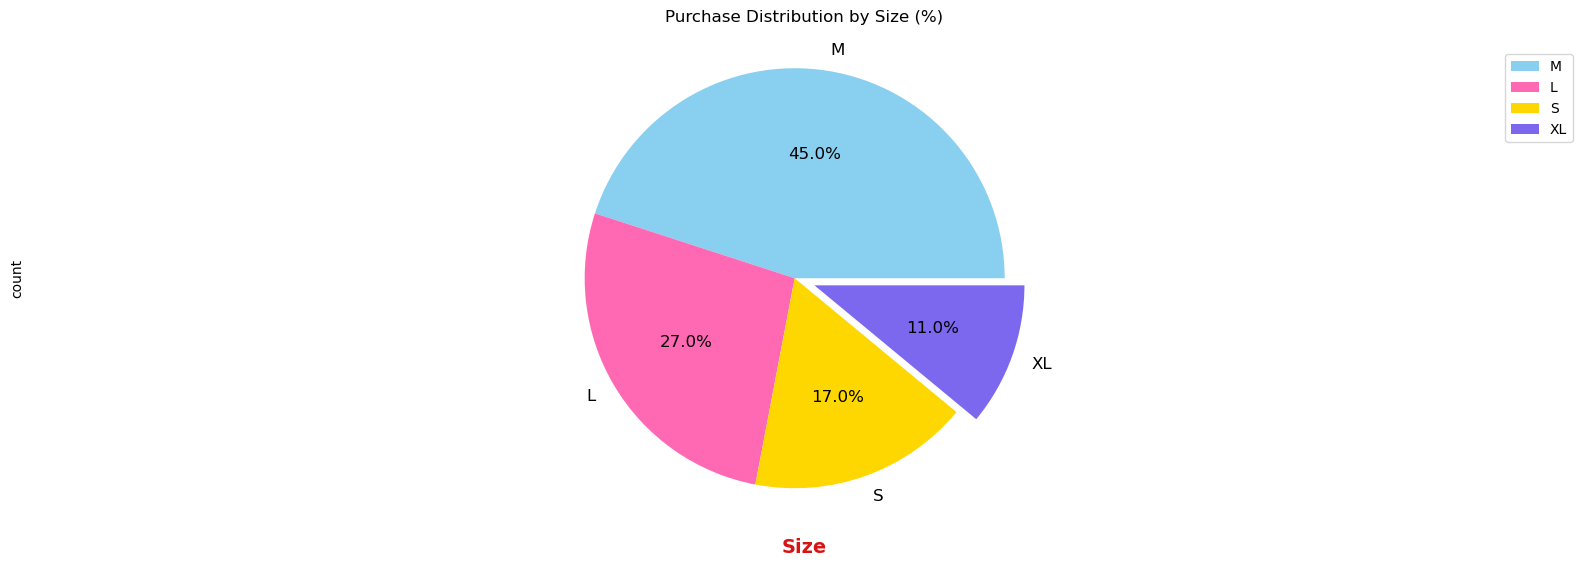

In [23]:
#Purchase distribution by size (%)
plt.figure(figsize = (20, 6))
df['Size'].value_counts().plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0, 0, 0, 0.1), autopct = '%1.1f%%')
plt.xlabel('Size', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = df['Size'].value_counts().index, loc = 'best')
plt.title('Purchase Distribution by Size (%)\n')
plt.show()

Further supporting the previous analysis, the bar chart shows that the number of M-size purchases (45.0%) is significantly higher than that of the others.

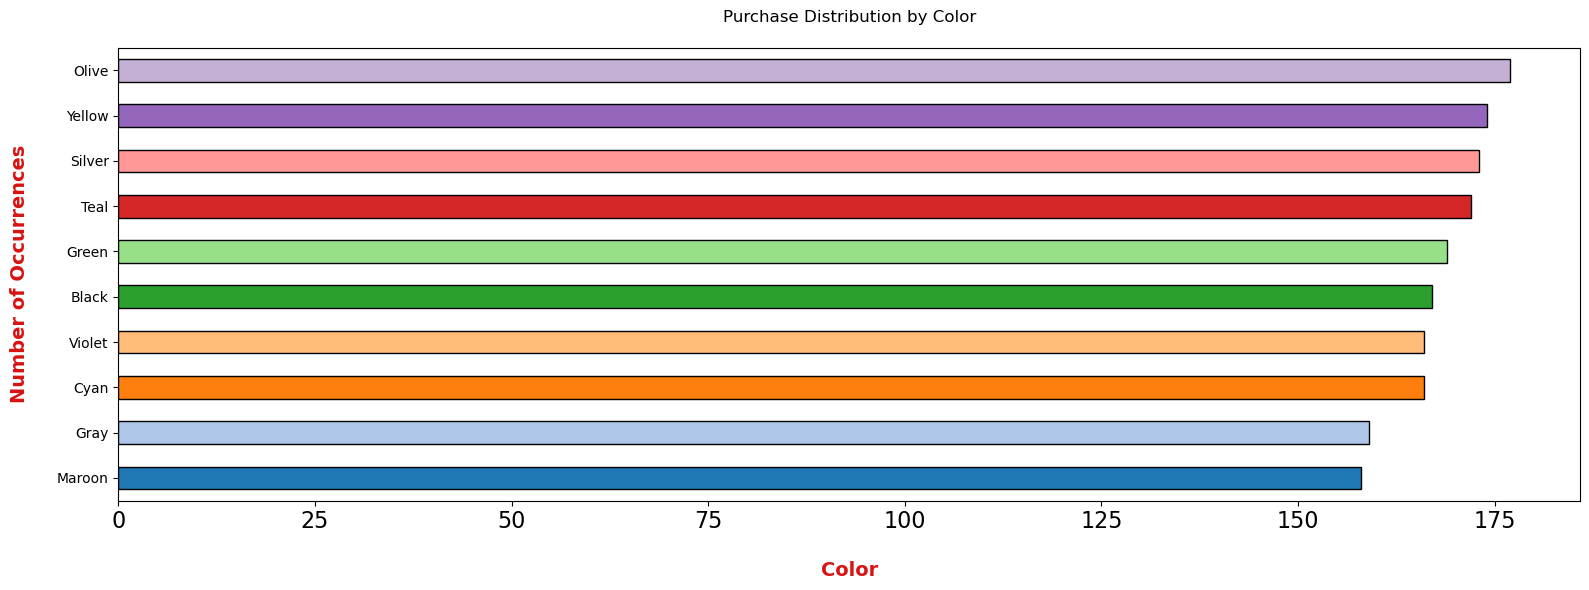

In [26]:
#Purchase distribution by color
plt.figure(figsize = (16, 6))
df['Color'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.title('Purchase Distribution by Color\n')
plt.tight_layout()
plt.show()

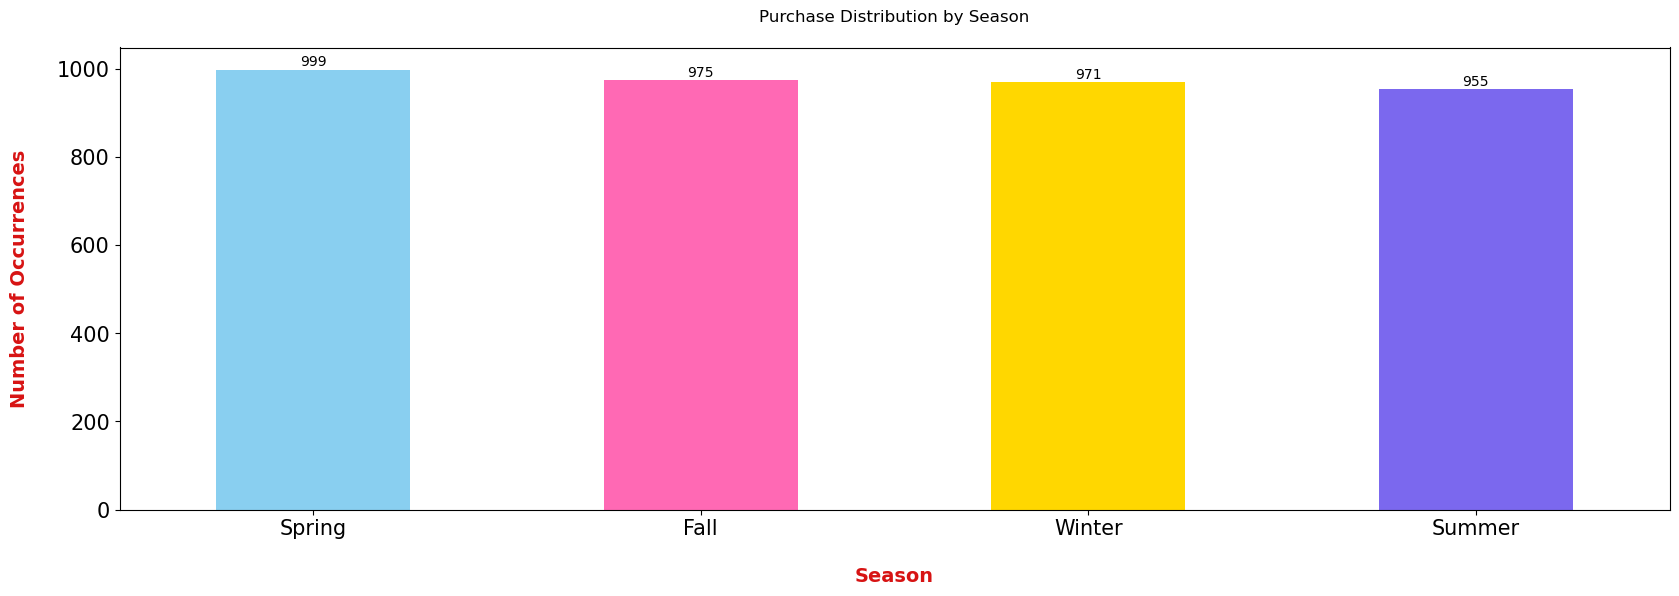

In [30]:
#Purchase distribution by season
plt.figure(figsize = (20, 6))
ax = df['Season'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(df['Season'].value_counts().index)
plt.xlabel('Season', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = 'bold', color = '#D71313', fontsize = 14, labelpad = 20)
plt.title('Purchase Distribution by Season\n')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.show()

The bar chart shows that spring had the highest number of purchases (999), followed closely by fall (975) and winter (971). Summer had the lowest (955), but the differences among seasons are minor. This suggests slightly higher shopping activity in spring, while overall demand remains steady year-round.